# Tabular methods in Reinforcement Learning

In [14]:
import gymnasium as gym
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from tqdm import tqdm
import imageio as iio

## Global config

In [15]:
'''Global configs'''
# plot configs
n_plot_step=10

# environment
env = gym.make("CliffWalking-v0", render_mode='rgb_array')


## All about the Environment

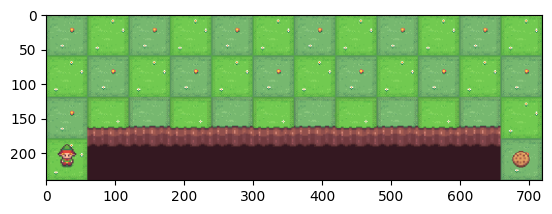

In [11]:
'''Make environment
- render_mode
    - 'human': open a live window (not interactive)
    - 'rgb_array': display an rgb image, can be rendered using plt.imshow(env.render())
'''
env.reset()
frame = env.render()
plt.imshow(frame)

In [12]:
print(f"_____STUDY THE ENVIRONMENT_____")
n_states = env.observation_space.n
print(f"Total number of observations: {n_states}")
print(f"Sample an observation from the observation space: {env.observation_space.sample()}")
n_actions = env.action_space.n
print(f"Total number of actions: {n_actions}")
print(f"Sample an action from the action space: {env.action_space.sample()}")

_____STUDY THE ENVIRONMENT_____
Total number of observations: 48
Sample an observation from the observation space: 24
Total number of actions: 4
Sample an action from the action space: 0


## Utils

In [13]:
def make_gif (qtable, out_dir='q-learning.gif', fps=1):
    '''Conduct the Q-learning policy while saving frames to make a video'''
    frames = []
    rewards = []
    state, info = env.reset()
    print(state)
    first_frame = env.render()
    frames.append(first_frame)
    while True:
        action = np.argmax(qtable[state, :])
        next_state, reward, terminated, truncated, info = env.step(action)
        rewards.append(reward)
        state = next_state
        frame = env.render()
        frames.append(frame)
        if terminated: break
    iio.mimsave(out_dir, [np.array(frame) for frame in frames], 'GIF')

## Dynamic Programming

In [21]:
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode='rgb_array')

- We can retrieve the dynamic of the environment, which takes the form (probabiliy, next_state, reward, terminated).
- For example, the following line of code prints out the dynamic of state 1, action 1 (move right)

In [27]:
print(env.P[1][1])

[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)]


- As we can see, by choosing to move to the right at state 1, the agent actually moves to the right, left, or down, each with probability of 1/3

<img src="images/frozen_lake/dynamic.png" width=300, height=300>

In [ ]:
def init_vtable (env):
    return np.zeros(n_states)

def init_policy (env):
    n_states = env.observation_space
    n_actions = env.action_space    
    return np.zeros()

In [29]:
def policy_evaluation(env, vtable, policy, n_iterations, threshold=0.01, gamma=0.9):
    delta = 0
    for i in range(n_iterations):
        for state in range(env.observation_space.n):
            old_value = vtable[state]
            new_value = 0
            for action in range(env.action_space.n):
                action_value = 0
                p_state_action = env.P[state][action]
                for possibility in p_state_action:
                    prob, new_state, reward, _ = possibility
                    action_value += prob * (reward + gamma*vtable[new_state])
                new_value += policy[state, action] * action_value
            delta = max(delta, np.abs(new_value - old_value))
        if (delta < threshold): break
    return vtable

In [30]:
def policy_improvement(env, vtable, gamma):
    '''Here we assume that our policy is deterministic'''
    policy = init_policy(env)
    for state in range(env.observation_space.n):
        action_values = []
        for action in range(env.action_space.n):
            action_value = 0
            p_state_action = env.P[state][action]
            for possibility in p_state_action:
                prob, new_state, reward, _ = possibility
                action_value += prob * (reward + gamma*vtable[new_state])
            action_values.append(action_value)
        best_action = np.argmax(np.array(action_values))
        policy[state][action] = 1
    return policy

In [ ]:
def policy_iteration(env):
    vtable = init_vtable(env)

## Monte Carlo

## Temporal Difference Learning (TD)

## SARSA

## Q-Learning

In [120]:
def init_qtable (n_states, n_actions):
    return np.zeros((n_states, n_actions))

In [121]:
def greedy_policy (qtable, state):
    action = np.argmax(qtable[state, :])
    return action

In [122]:
def epsilon_greedy_policy (qtable, state, epsilon=0.1):
    if (np.random.rand() > epsilon):
        action = greedy_policy(qtable, state)
    else:
        action = env.action_space.sample()
    return action

<img src=qlearning_algo.png width=800, height=350>

In [16]:
def q_learning (env, n_episodes=10000, epsilon=0.1, lr=0.1, gamma=0.9):
    step = n_episodes / n_plot_steps
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    qtable = init_qtable(n_states, n_actions)
    metadata = {}

    plot_episodes = []
    plot_rewards = []

    for episode in tqdm(range(n_episodes)):
        state, info = env.reset()
        while True:
            action = epsilon_greedy_policy(qtable, state, epsilon)
            new_state, reward, terminated, truncated, info = env.step(action)

            # update qtable
            qtable[state, action] = qtable[state,action] + lr * (reward + gamma*np.max(qtable[new_state, :] - qtable[state, action]))

            state = new_state

            if (episode % step == 0): 
                plot_episodes.append(episode)
                plot_rewards.append(reward)
            if (terminated): break
    metadata['plot_episode'] = plot_episodes
    metadata['plot_reward'] = plot_rewards
    return qtable

In [3]:
learned_qtable, metadata = q_learning(env)

NameError: name 'train' is not defined

[[ -14.09388553  -14.02990705  -14.16172578  -14.02999456]
 [ -13.43482276  -13.37406016  -13.43310181  -13.44278619]
 [ -12.67251323  -12.51537664  -12.5525321   -12.71898028]
 [ -11.63337939  -11.63613335  -11.63266598  -11.74588167]
 [ -10.72623274  -10.70570791  -10.69624948  -11.10358362]
 [  -9.76350762   -9.72275349   -9.72219043  -10.12673879]
 [  -8.74738686   -8.69553647   -8.71032849   -8.77508011]
 [  -7.7509141    -7.65214755   -7.65299366   -8.1698969 ]
 [  -6.65204822   -6.59351754   -6.59449026   -6.9260283 ]
 [  -5.5168356    -5.51789815   -5.51998819   -5.72864912]
 [  -4.47402571   -4.43137712   -4.4312539    -5.08298471]
 [  -3.37941891   -3.37153308   -3.33273398   -3.5240152 ]
 [ -14.7118951   -14.4444421   -14.44444206  -15.1425241 ]
 [ -14.02736343  -13.33333333  -13.33333333  -14.73967749]
 [ -13.02388038  -12.22222222  -12.22222222  -13.85900025]
 [ -12.16611325  -11.11111111  -11.11111111  -12.85591819]
 [ -11.24150365  -10.          -10.          -11.9135169

<Axes: >

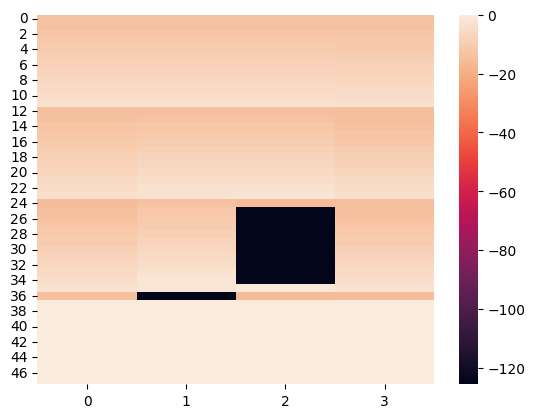

In [125]:
print(learned_qtable)
sns.heatmap(learned_qtable)

We can notice a few things from this plot:
- Values from state 37 to 46 are 0, because these are terminal states.
- Values of the states on the right (11, 23, 35) are generally higher than values of the states on the left (0, 12, 24, 36) with respect to all actions.
- From state 25 to 34, values corresponding to the "move down" action are lower than values correspond to other actions
- When in state 36, "move right" is the least desirable action to take

## N-step Boostrapping